# Installation

In [1]:
# install machine gnostic learning packages
# ! pip install machinegnostics # only if not installed

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Data

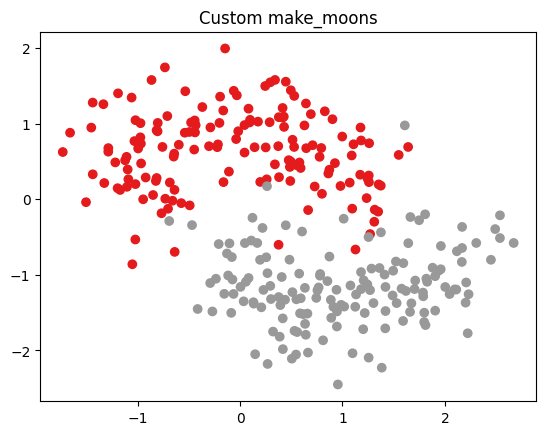

In [46]:

import numpy as np
import matplotlib.pyplot as plt

def make_moons_manual(n_samples=100, noise=0.2):
    n_samples_out = n_samples // 2
    n_samples_in = n_samples - n_samples_out

    # First half moon
    outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples_out))
    outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples_out))
    
    # Second half moon
    inner_circ_x = 1 - np.cos(np.linspace(0, np.pi, n_samples_in))
    inner_circ_y = -np.sin(np.linspace(0, np.pi, n_samples_in)) - 0.5

    X = np.vstack([
        np.stack([outer_circ_x, outer_circ_y], axis=1),
        np.stack([inner_circ_x, inner_circ_y], axis=1)
    ])
    y = np.array([0] * n_samples_out + [1] * n_samples_in)

    # Add noise
    X += np.random.normal(scale=noise, size=X.shape)
    
    return X, y

# Example usage
X, y = make_moons_manual(n_samples=300, noise=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.title("Custom make_moons")
plt.show()


# Machine Gnostics Imports

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from machinegnostics.models.classification import LogisticRegressor
from machinegnostics.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score


# Logistic Regressor - Training - Gnostic Sigmoid probability

In [48]:
# --- Gnostic Logistic Regression (with polynomial features for nonlinearity) ---
# using gnostic influenced sigmoid function for probability estimation
model = LogisticRegressor(degree=3,verbose=True, early_stopping=True, proba='sigmoid', tol=0.01, max_iter=100)
model.fit(X, y)
proba_gnostic = model.predict_proba(X)
y_pred_gnostic = model.predict(X)

Iteration 1, Log Loss: 0.693147, mean residual entropy: 0.500000
Iteration 2, Log Loss: 0.261287, mean residual entropy: 0.542833
Iteration 3, Log Loss: 0.126165, mean residual entropy: 0.378128
Iteration 4, Log Loss: 0.091567, mean residual entropy: 0.327727
Iteration 5, Log Loss: 0.079562, mean residual entropy: 0.302100
Converged at iteration 6 (early stop): log_loss change below tolerance (log_loss=4.299001e-03).


# Prediction and Metrics

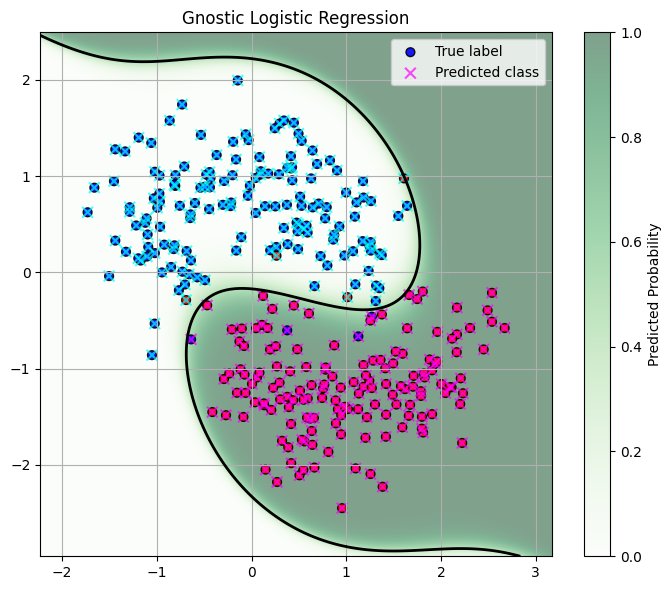

Gnostic Logistic Regression Evaluation:
Accuracy: 0.9733333333333334
Precision: 0.9733333333333334
Recall: 0.9733333333333334
F1-score: 0.9733333333333334

Confusion Matrix:
 [[146   4]
 [  4 146]]

Classification Report:
 Class           Precision    Recall  F1-score   Support
0                    0.97      0.97      0.97       150
1                    0.97      0.97      0.97       150
Avg/Total            0.97      0.97      0.97       300



In [49]:
# --- Plot probability contour and predictions ---
fig, ax = plt.subplots(figsize=(7, 6))

def plot_proba_contour(ax, model, X, title):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = model.predict_proba(grid)
    zz = zz.reshape(xx.shape)

    im = ax.imshow(zz, extent=(x_min, x_max, y_min, y_max), origin='lower',
                   aspect='auto', cmap='Greens', alpha=0.5, vmin=0, vmax=1)
    plt.colorbar(im, ax=ax, label='Predicted Probability')
    ax.contour(xx, yy, zz, levels=[0.5], colors='k', linewidths=2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(title)

plot_proba_contour(ax, model, X, "Gnostic Logistic Regression")
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=40, label='True label', alpha=0.9)
ax.scatter(X[:, 0], X[:, 1], c=y_pred_gnostic, cmap='cool', marker='x', s=60, label='Predicted class', alpha=0.7)
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# --- Evaluation ---
print('Gnostic Logistic Regression Evaluation:')
print("Accuracy:", accuracy_score(y, y_pred_gnostic))
print("Precision:", precision_score(y, y_pred_gnostic))
print("Recall:", recall_score(y, y_pred_gnostic))
print("F1-score:", f1_score(y, y_pred_gnostic))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_gnostic))
print("\nClassification Report:\n", classification_report(y, y_pred_gnostic))

# History

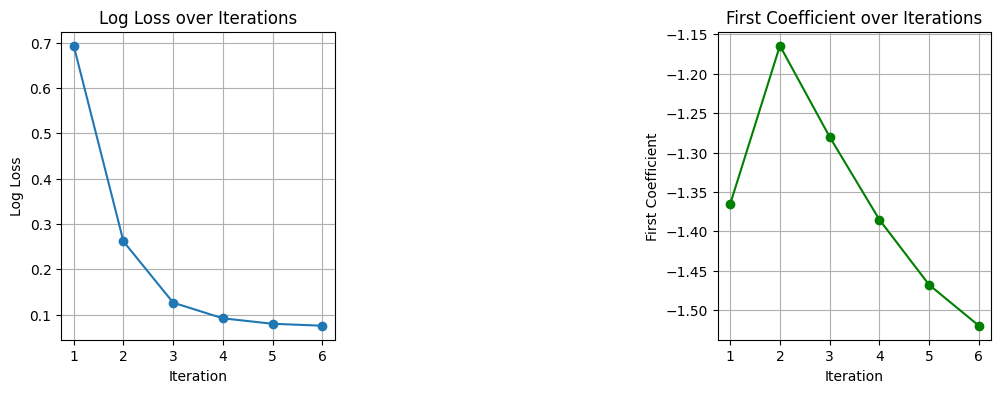

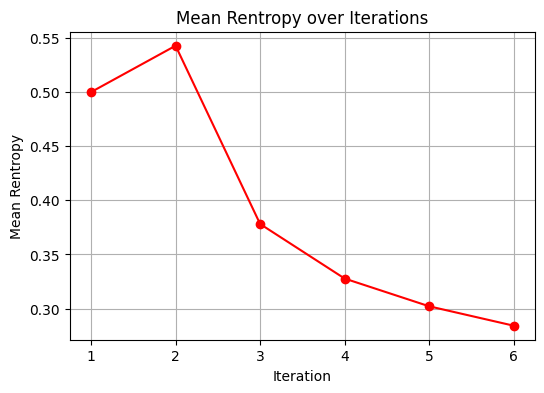

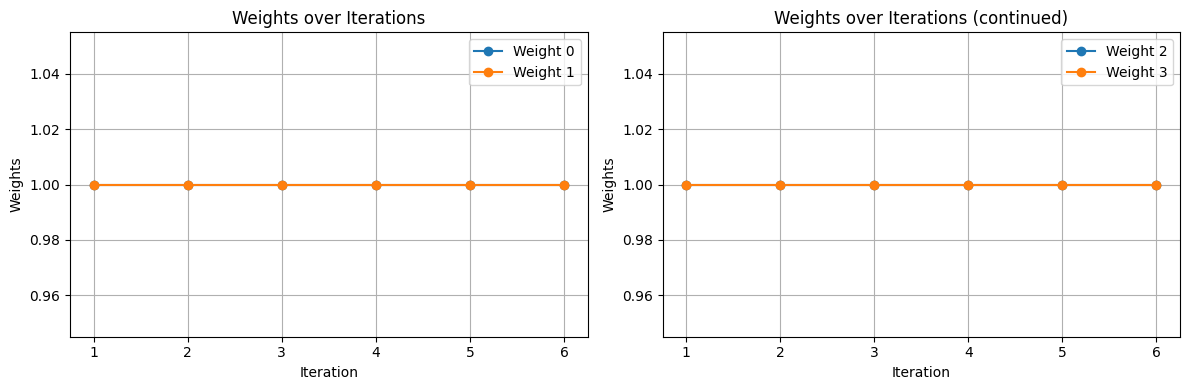

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Extract history
history = model._history

iterations = [h['iteration'] for h in history]
log_loss = [h['log_loss'] for h in history]
mean_rentropy = [np.mean(h['rentropy']) for h in history]
# Optionally, track the first coefficient as an example
coef_0 = [h['coefficients'][0] for h in history]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(iterations, log_loss, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss over Iterations')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(iterations, coef_0, marker='o', color='green')
plt.xlabel('Iteration')
plt.ylabel('First Coefficient')
plt.title('First Coefficient over Iterations')
plt.grid(True)

# rentropy plot
plt.figure(figsize=(6, 4))
plt.plot(iterations, mean_rentropy, marker='o', color='red')
plt.xlabel('Iteration')
plt.ylabel('Mean Rentropy')
plt.title('Mean Rentropy over Iterations')
plt.grid(True)

# plots weights
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(iterations, [h['weights'][0] for h in history], marker='o', label='Weight 0')
plt.plot(iterations, [h['weights'][1] for h in history], marker='o', label='Weight 1')
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.title('Weights over Iterations')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(iterations, [h['weights'][2] for h in history], marker='o', label='Weight 2')
plt.plot(iterations, [h['weights'][3] for h in history], marker='o', label='Weight 3')
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.title('Weights over Iterations (continued)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Logistic Regressor - Training - Gnostic probability

In [63]:
# --- Gnostic Logistic Regression (with polynomial features for nonlinearity) ---
# using gnostic probability estimation
model = LogisticRegressor(degree=3,verbose=True, early_stopping=True, max_iter=50, proba='gnostic', tol=0.001)
model.fit(X, y)
proba_gnostic = model.predict_proba(X)
y_pred_gnostic = model.predict(X)

Iteration 1, Log Loss: 0.073161, mean residual entropy: 0.500000
Iteration 2, Log Loss: 1.541690, mean residual entropy: 0.438260
Iteration 3, Log Loss: 2.124392, mean residual entropy: 0.357377
Iteration 4, Log Loss: 2.062653, mean residual entropy: 0.346145
Iteration 5, Log Loss: 2.019866, mean residual entropy: 0.344158
Iteration 6, Log Loss: 1.997187, mean residual entropy: 0.342260
Iteration 7, Log Loss: 1.985001, mean residual entropy: 0.339794
Iteration 8, Log Loss: 1.978502, mean residual entropy: 0.337036
Iteration 9, Log Loss: 1.975456, mean residual entropy: 0.334187
Converged at iteration 10 (early stop): log_loss change below tolerance (log_loss=6.789793e-04).


# Prediction and Metrics

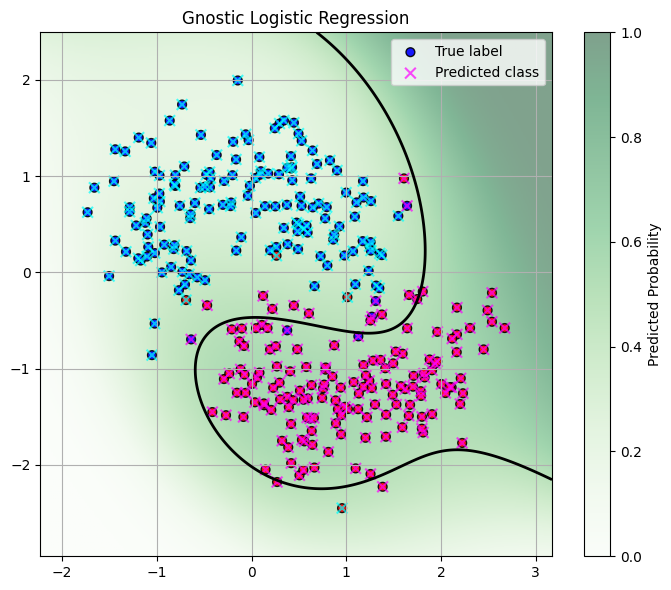

Gnostic Logistic Regression Evaluation:
Accuracy: 0.9666666666666667
Precision: 0.9605263157894737
Recall: 0.9733333333333334
F1-score: 0.9668874172185431

Confusion Matrix:
 [[144   6]
 [  4 146]]

Classification Report:
 Class           Precision    Recall  F1-score   Support
0                    0.97      0.96      0.97       150
1                    0.96      0.97      0.97       150
Avg/Total            0.97      0.97      0.97       300



In [64]:
# --- Plot probability contour and predictions ---
fig, ax = plt.subplots(figsize=(7, 6))

def plot_proba_contour(ax, model, X, title):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = model.predict_proba(grid)
    zz = zz.reshape(xx.shape)

    im = ax.imshow(zz, extent=(x_min, x_max, y_min, y_max), origin='lower',
                   aspect='auto', cmap='Greens', alpha=0.5, vmin=0, vmax=1)
    plt.colorbar(im, ax=ax, label='Predicted Probability')
    ax.contour(xx, yy, zz, levels=[0.5], colors='k', linewidths=2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(title)

plot_proba_contour(ax, model, X, "Gnostic Logistic Regression")
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=40, label='True label', alpha=0.9)
ax.scatter(X[:, 0], X[:, 1], c=y_pred_gnostic, cmap='cool', marker='x', s=60, label='Predicted class', alpha=0.7)
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# --- Evaluation ---
print('Gnostic Logistic Regression Evaluation:')
print("Accuracy:", accuracy_score(y, y_pred_gnostic))
print("Precision:", precision_score(y, y_pred_gnostic))
print("Recall:", recall_score(y, y_pred_gnostic))
print("F1-score:", f1_score(y, y_pred_gnostic))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_gnostic))
print("\nClassification Report:\n", classification_report(y, y_pred_gnostic))

# History

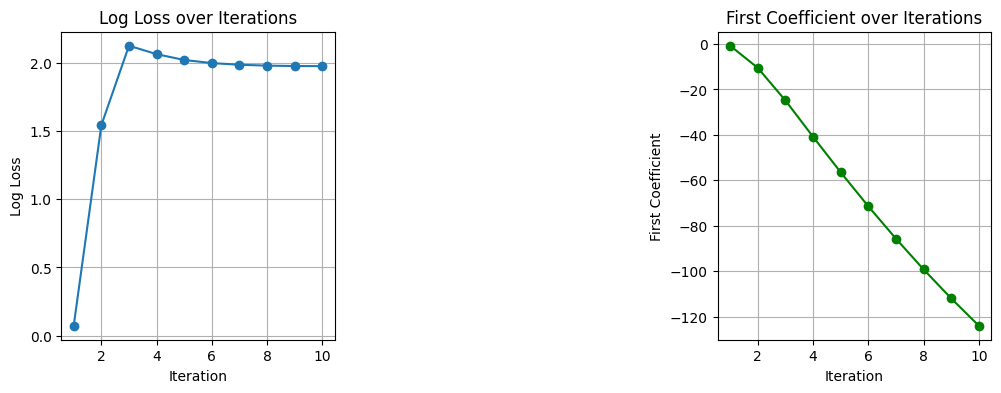

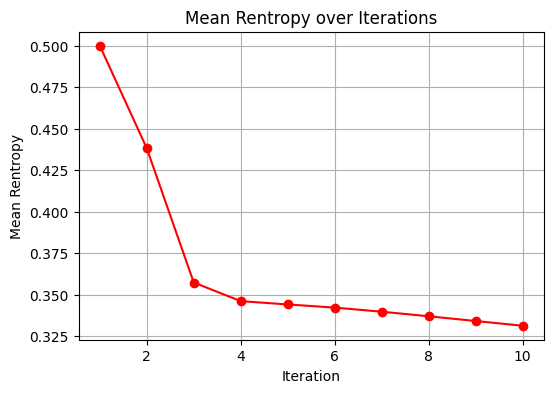

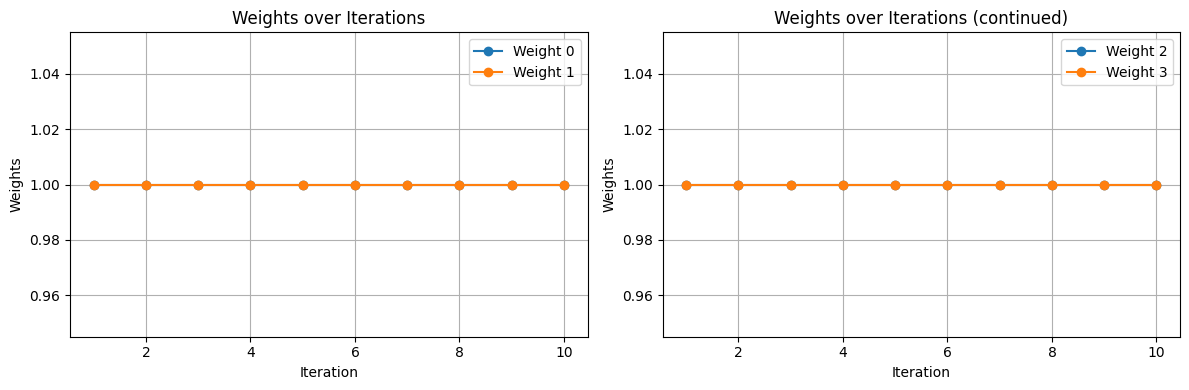

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Extract history
history = model._history

iterations = [h['iteration'] for h in history]
log_loss = [h['log_loss'] for h in history]
mean_rentropy = [np.mean(h['rentropy']) for h in history]
# Optionally, track the first coefficient as an example
coef_0 = [h['coefficients'][0] for h in history]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(iterations, log_loss, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss over Iterations')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(iterations, coef_0, marker='o', color='green')
plt.xlabel('Iteration')
plt.ylabel('First Coefficient')
plt.title('First Coefficient over Iterations')
plt.grid(True)

# rentropy plot
plt.figure(figsize=(6, 4))
plt.plot(iterations, mean_rentropy, marker='o', color='red')
plt.xlabel('Iteration')
plt.ylabel('Mean Rentropy')
plt.title('Mean Rentropy over Iterations')
plt.grid(True)

# plots weights
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(iterations, [h['weights'][0] for h in history], marker='o', label='Weight 0')
plt.plot(iterations, [h['weights'][1] for h in history], marker='o', label='Weight 1')
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.title('Weights over Iterations')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(iterations, [h['weights'][2] for h in history], marker='o', label='Weight 2')
plt.plot(iterations, [h['weights'][3] for h in history], marker='o', label='Weight 3')
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.title('Weights over Iterations (continued)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()